In [36]:
import numpy as np
from matplotlib import pyplot as plt
import json, os

In [135]:
run = 7
Gamma0 = 20.00
rhoseed = 3.5 #0.9#0.16
rgamma = 2.0
gammaxx= 1.0
gammayy=gammaxx*rgamma

alpha = 0.1
chi = 5.0

ddir = '/data' #'/new_drho_uniform_data'
model = '/model_chi_test'

pdir = '../'+ddir+model+'/gamma0_{:1.1f}_rhoseed_{:1.2f}/rgamma_{:1.2f}_alpha_{:1.2f}_chi_{:1.2f}/run_{:d}/'.format(Gamma0, rhoseed, rgamma, alpha, chi, run)

datadir = pdir+'data/'

with open(pdir+'parameters.json') as jsonFile:
    parameters = json.load(jsonFile)

T         = parameters["T"]        # final time
dt_dump   = parameters["dt_dump"]
n_steps   = int(parameters["n_steps"])  # number of time steps
n_dump = int(T/dt_dump); dn_dump = int(n_steps/n_dump)
K         = parameters["K"]        # elastic constant, sets diffusion lengthscale of S with Gamma0
d         = parameters["d"]; print(d)
lambd     = parameters["lambda"]
rho_in    = parameters["rho_in"]   # isotropic to nematic transition density, or "onset of order in the paper"
rhoisoend = parameters["rhoisoend"] /rho_in   # jamming density
rhonemend = parameters["rhonemend"] /rho_in   # jamming density max for nematic substrate
mx        = np.int32(parameters["mx"])
my        = np.int32(parameters["my"])
dx        = np.float32(parameters["dx"])
dy        = np.float32(parameters["dy"])
#setup a meshgrid
tol = 0.001

x   = np.linspace(0+tol, 1-tol, mx)
y   = np.linspace(0+tol, 1-tol, my)
xv, yv  = np.meshgrid(x,y)


times = np.arange(0, n_dump, 1)*dt_dump

print(n_dump)

2
50000


6.737579569538237 0.5309907009413902
1.09375


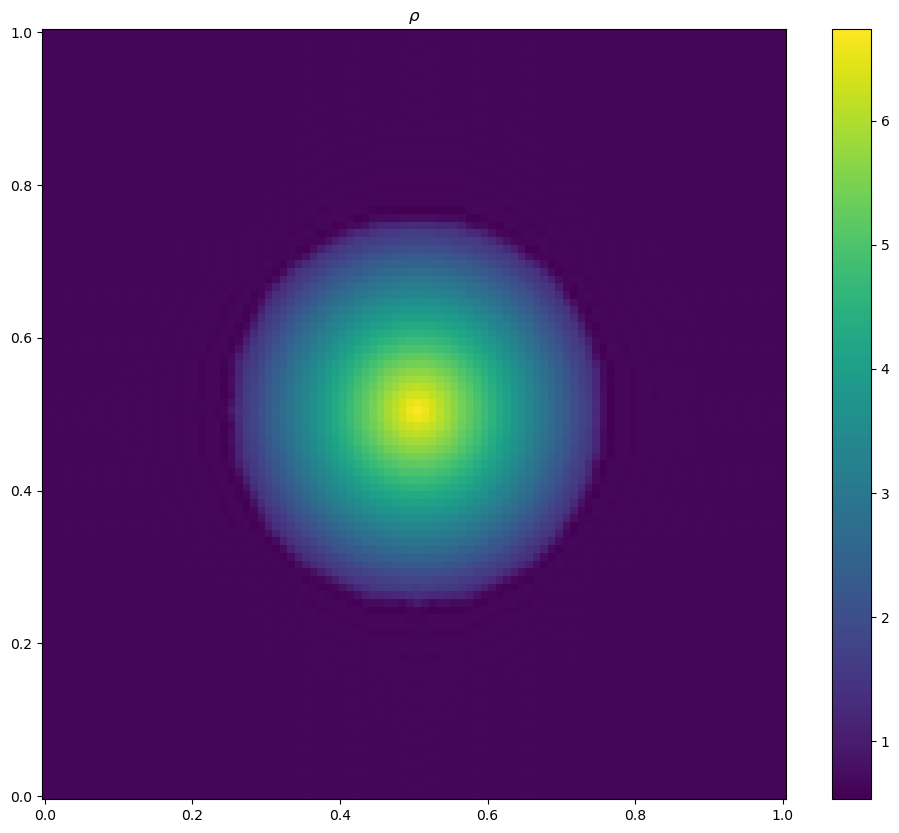

In [87]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax=plt.subplots(figsize=(12,10))
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
n=2
field = np.loadtxt(datadir+'rho.csv.{:d}'.format(n), delimiter=',')
Qx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S2 = Qx**2 + Qy**2
p_factor = 2

fmax = np.max(field); fmin=np.min(field); print(fmax, fmin)
print(np.average(field))
#ctrf = [ax.pcolormesh(xv, yv, S_sqrd[i], cmap=cmap1, vmin=0, vmax=Smax), ax.quiver(xv,yv,nx[i],ny[i], color='w')]
ctrf = [ax.pcolormesh(xv, yv, field, vmin=fmin, vmax=fmax)]
plt.colorbar(ctrf[0])
plt.title(r"$\rho$")
plt.show()

6.539142391639939e-05 0.9818639810412578
0.22636632671714405


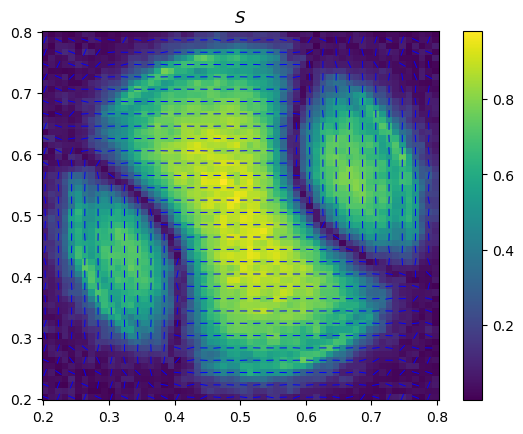

In [138]:
fig, ax=plt.subplots()
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

n=260

Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S = np.sqrt(Qxx**2+Qxy**2)
theta = np.arctan2(Qxy, Qxx)/2
nx    = np.cos(theta)
ny    = np.sin(theta)

print(np.min(S), np.max(S))

p_factor = 2
#print(p_half_defects, m_half_defects)

print(np.mean(theta))

ix, fx, iy, fy = 20, 80, 20, 80
ctrf = [ax.pcolormesh(xv[ix:fx, iy:fy], yv[ix:fx, iy:fy], (S)[ix:fx, iy:fy], cmap='viridis', vmin=np.min(S), vmax=np.max(S))]
ax.quiver(xv[ix:fx:p_factor, iy:fy:p_factor],yv[ix:fx:p_factor, iy:fy:p_factor], nx[ix:fx:p_factor, iy:fy:p_factor], ny[ix:fx:p_factor, iy:fy:p_factor], color='b', pivot='middle', headlength=0, headaxislength=0)
#ax.scatter(p_half_defects[1]/mx, p_half_defects[0]/my, color='pink')
#ax.scatter(m_half_defects[1]/mx, m_half_defects[0]/my, color='red')
#ctrf = [ax.pcolormesh(xv, yv, rho[i], cmap=cmap1, vmin=np.min(rho), vmax=np.max(rho)), ax.quiver(xv,yv,nx[i],ny[i], color='w', headlength=0, headaxislength=0, width=0.006, pivot='middle')]
#ctrf = [ax.pcolormesh(xv, yv, rho[i]*v[i,:,:,1])]
plt.colorbar(ctrf[0])
plt.title(r"$ S $")
plt.show()

In [13]:
def pixelate(x, gridpoints):
    nx, ny = np.shape(x)
    xpad = np.pad(x, (gridpoints, gridpoints), 'wrap')
    ret = np.zeros(np.shape(x))
    for cx in np.arange(nx):
        for cy in np.arange(ny):
            ret[cx, cy] += np.average(xpad[cx:cx+2*gridpoints, cy:cy+2*gridpoints])
    return ret